In [1]:
import pandas as pd
import numpy as np
import sqlite3
import json
import matplotlib.pyplot as plt

In [2]:
EXPERIMENT_DIR = '/Users/darylwilding-mcbride/Downloads/experiments/YHE-R'
RESULTS_DB_NAME = '{}/summarised-results/results.sqlite'.format(EXPERIMENT_DIR)
db_conn = sqlite3.connect(RESULTS_DB_NAME)
results_df = pd.read_sql_query("select * from sequences", db_conn)
db_conn.close()

In [3]:
len(results_df)

29553

In [4]:
results_df.sample(n=5)

,sequence,charge,human,identifications,extractions
23587,STHNEDQASCEVLTVK,2,1,"{""perc_q_value"": 4.5472297e-05, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro..."
12320,IIAGALDNGSLELYSTNEANNAINSMAR,2,0,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro..."
26243,VDNMIIQSISLLDQLDK,2,1,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro..."
28306,WNLDELPK,2,1,"{""perc_q_value"": 0.0066376925, ""run_names"": [""...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro..."
10889,HFIMQVVCEATQCPDTR,2,1,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro..."


In [5]:
results_df['identifications_d'] = results_df.apply(lambda row: json.loads(row.identifications), axis=1)
results_df['id_perc_q_value'] = results_df.apply(lambda row: row.identifications_d['perc_q_value'], axis=1)
results_df['id_count_all_runs'] = results_df.apply(lambda row: len(row.identifications_d['run_names']), axis=1)
results_df['id_count_human_only_runs'] = results_df.apply(lambda row: sum('YHE010' in s for s in row.identifications_d['run_names']), axis=1)

In [6]:
results_df.sample(n=3)

,sequence,charge,human,identifications,extractions,identifications_d,id_perc_q_value,id_count_all_runs,id_count_human_only_runs
25359,TQLEQDSIIEALLPLSMEAK,3,1,"{""perc_q_value"": 1.9514534e-05, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 1.9514534e-05, 'run_names': [...",0.000020,3,0
18241,NFNDPEVQGDMK,2,0,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 2.9439299e-06, 'run_names': [...",0.000003,10,0
11226,HMLADVFSVK,2,1,"{""perc_q_value"": 0.0001248106, ""run_names"": [""...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 0.0001248106, 'run_names': ['...",0.000125,2,1


In [7]:
results_df = results_df[results_df.extractions.notnull()].copy()

In [8]:
results_df['extractions_l'] = results_df.apply(lambda row: json.loads(row.extractions), axis=1)

In [9]:
results_df.sample(n=5)

,sequence,charge,human,identifications,extractions,identifications_d,id_perc_q_value,id_count_all_runs,id_count_human_only_runs,extractions_l
18649,NLVATFICVFEK,2,1,"{""perc_q_value"": 0.00046224997000000005, ""run_...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 0.00046224997000000005, 'run_...",0.000462,3,0,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro..."
12774,INWGPVLTDLPMWDK,2,0,"{""perc_q_value"": 1.1546711000000001e-05, ""run_...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 1.1546711000000001e-05, 'run_...",0.000012,2,0,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro..."
811,AGNWPGSPQVSGPSPAAR,2,1,"{""perc_q_value"": 2.7146619e-05, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 2.7146619e-05, 'run_names': [...",0.000027,7,1,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro..."
10043,GPLQSVQVFGR,2,1,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 2.9439299e-06, 'run_names': [...",0.000003,9,8,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro..."
5140,EALQLMATYLPK,2,1,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 2.9439299e-06, 'run_names': [...",0.000003,10,10,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro..."


In [10]:
results_df.loc[755].identifications_d

{'perc_q_value': 2.9439299e-06,
 'run_names': ['YHE010_09_Slot1-1_1_2994',
  'YHE010_07_Slot1-1_1_2992',
  'YHE010_05_Slot1-1_1_2990',
  'YHE010_08_Slot1-1_1_2993',
  'YHE010_10_Slot1-1_1_2995',
  'YHE010_04_Slot1-1_1_2989',
  'YHE114_02_Slot1-1_1_3009',
  'YHE010_03_Slot1-1_1_2988',
  'YHE211_08_Slot1-1_1_3004',
  'YHE010_02_Slot1-1_1_2987',
  'YHE010_06_Slot1-1_1_2991',
  'YHE114_11_Slot1-1_1_3043',
  'YHE114_03_Slot1-1_1_3010',
  'YHE114_07_Slot1-1_1_3014',
  'YHE211_03_Slot1-1_1_2999',
  'YHE211_04_Slot1-1_1_3000']}

In [11]:
results_df['ext_count_all_runs'] = results_df.apply(lambda row: len(row.extractions_l), axis=1)
results_df['ext_count_human_only_runs'] = results_df.apply(lambda row: sum('YHE010' in s['run_name'] for s in row.extractions_l), axis=1)

In [12]:
results_df.sample(n=3)

,sequence,charge,human,identifications,extractions,identifications_d,id_perc_q_value,id_count_all_runs,id_count_human_only_runs,extractions_l,ext_count_all_runs,ext_count_human_only_runs
3545,DGPLSTNVEAK,1,0,"{""perc_q_value"": 6.2057677e-05, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 6.2057677e-05, 'run_names': [...",0.000062,2,0,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro...",19,8
8456,FQYLLCVLSYDPTK,2,1,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 2.9439299e-06, 'run_names': [...",0.000003,26,5,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro...",31,10
9924,GNLAAFVEQKPEAK,2,0,"{""perc_q_value"": 2.9439299e-06, ""run_names"": [...","[{""run_name"": ""YHE114_11_Slot1-1_1_3043"", ""pro...","{'perc_q_value': 2.9439299e-06, 'run_names': [...",0.000003,11,0,"[{'run_name': 'YHE114_11_Slot1-1_1_3043', 'pro...",25,4


In [13]:
# remove the peptides that were not identified in the human-only runs
human_id_df = results_df[(results_df.id_count_human_only_runs > 0)]

In [18]:
len(human_id_df)

17751

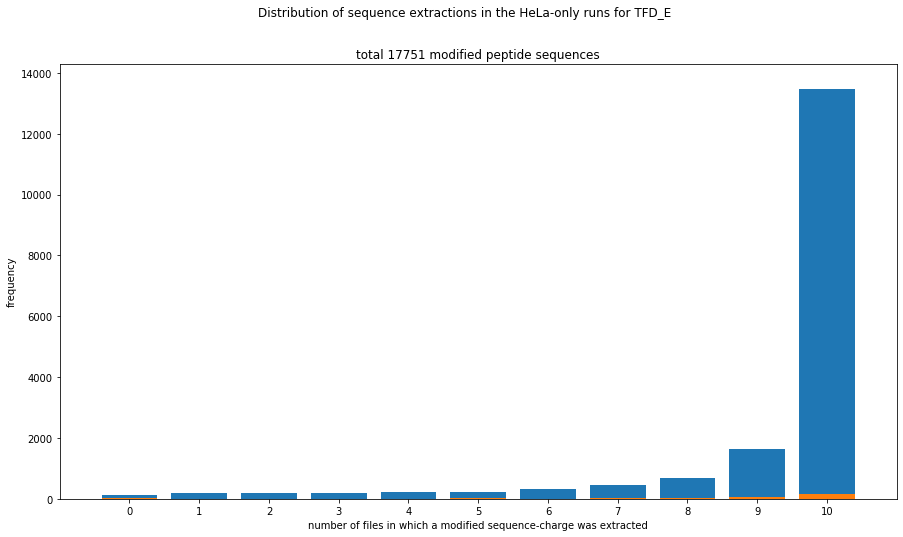

In [19]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence extractions in the HeLa-only runs for TFD_E')
plt.title('total {} modified peptide sequences'.format(len(human_id_df)))

counts_human = np.bincount(human_id_df[human_id_df.human == True].ext_count_human_only_runs)
counts_other = np.bincount(human_id_df[human_id_df.human == False].ext_count_human_only_runs)

ax1.bar(range(11), counts_human, bottom=counts_other, width=0.8, align='center')
ax1.bar(range(11), counts_other, width=0.8, align='center')

plt.xlabel('number of files in which a modified sequence-charge was extracted')
plt.ylabel('frequency')
ax1.set(xticks=range(0,11), xlim=[-1, 11])
# plt.ylim((0,20000))

plt.show()

In [17]:
len(results_df[(results_df.id_count_human_only_runs > 0) & (results_df.ext_count_human_only_runs > 0)]) / len(results_df[(results_df.ext_count_human_only_runs > 0)])

0.6333405234397469

In [34]:
# missing values
(1.0 - (human_id_df.ext_count_human_only_runs.sum() / (len(human_id_df) * 10))) * 100

8.031096839614671

In [35]:
# false discovery rate
len(human_id_df[human_id_df.human == False]) / len(human_id_df) * 100

1.7238465438566841